In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Non-linear regressions are a relationship between independent variables $x$ and a dependent variable $y$ which result in a non-linear function modeled data. Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of $k$ degrees (maximum power of $x$). 

$$ \ y = a x^3 + b x^2 + c x + d \ $$

Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example: $$ y = \log(x)$$
    
Or even, more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

###### Cubic Function Graph 

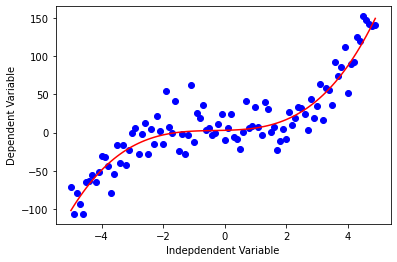

In [2]:
x = np.arange(-5.0, 5.0, 0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

###### Quadratic Function

$$ Y = X^2 $$

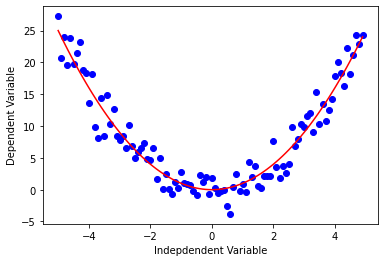

In [3]:
x = np.arange(-5.0, 5.0, 0.1)


y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

###### Exponential Function

An exponential function with base c is defined by $$ Y = a + b c^X$$ where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable. 


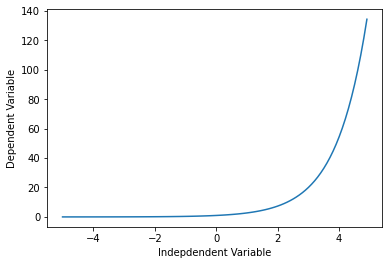

In [4]:
X = np.arange(-5.0, 5.0, 0.1)


Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic

The response $y$ is a results of applying logarithmic map from input $x$'s to output variable $y$. It is one of the simplest form of __log()__: i.e. $$ y = \log(x)$$

Please consider that instead of $x$, we can use $X$, which can be polynomial representation of the $x$'s. In general form it would be written as  
\begin{equation}
y = \log(X)
\end{equation}

C:\Users\Vishwam\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


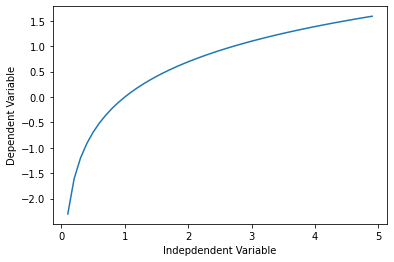

In [5]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

###### Sigmoidal/Logistic 

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$

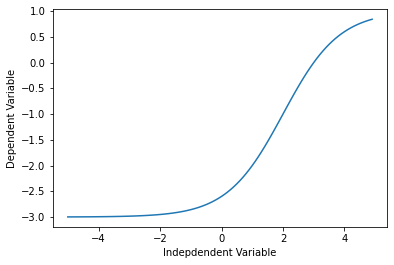

In [6]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Doing non linear regrssion on a dataset about chinas gdp

In [7]:
df=pd.read_csv('china_gdp.csv')
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


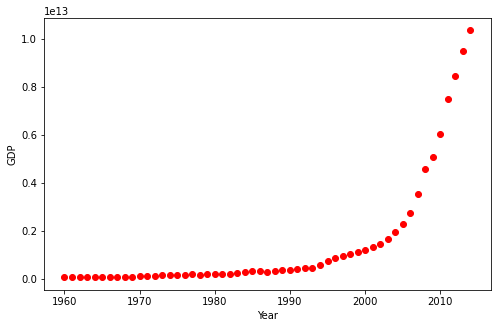

In [9]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

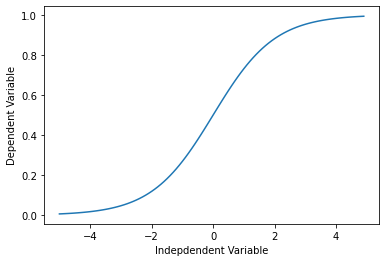

In [10]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [11]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

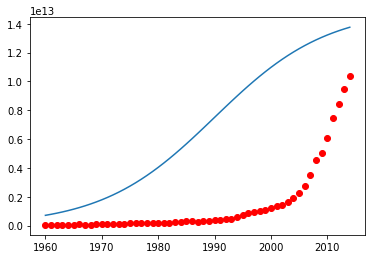

In [12]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [13]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [14]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451711, beta_2 = 0.997207


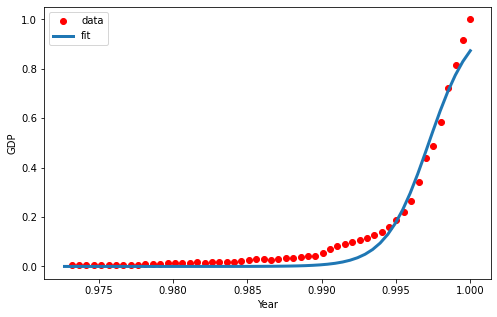

In [15]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [16]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )



Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.86
